# Read Data
[Dataset Link](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)

In [ ]:
import pandas as pd

data = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
print(data)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


# Build the Neural Network
[Practice Site](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

[Model Visualization](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

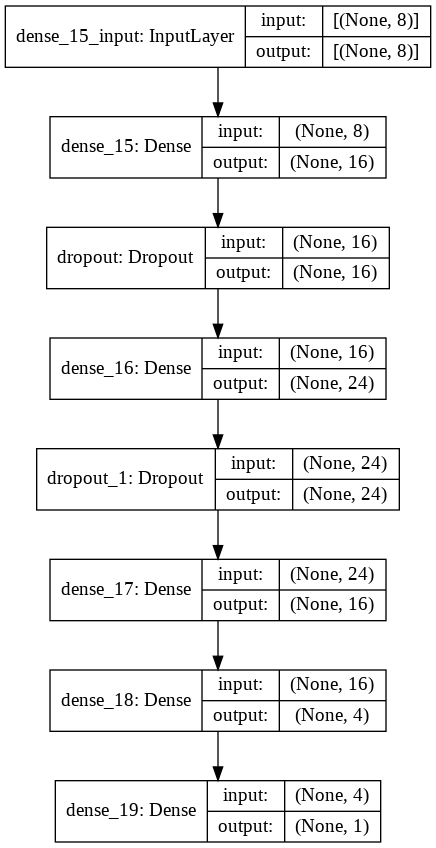

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model

model = Sequential()

# input_layer = 8
# hidden_layer 1 = 16 neurons
# hidden_layer 2 = 24 neurons
# hidden_layer 3 = 16 neurons
# hidden_layer 4 = 4 neurons
# output_layer = 1 

hidden_layer1 = Dense(16, input_dim=8, activation='relu')  # relu = Rectified Linear Unit
model.add(hidden_layer1)

model.add(Dropout(rate=0.1))

hidden_layer2 = Dense(24, activation='relu')
model.add(hidden_layer2)

model.add(Dropout(rate=0.1))

hidden_layer3 = Dense(16, activation='relu')
model.add(hidden_layer3)

hidden_layer4 = Dense(4, activation='relu')
model.add(hidden_layer4)

output_layer = Dense(1, activation='sigmoid')
model.add(output_layer)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

print(model.summary())

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:8]
y = data.iloc[:, 8]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=1, stratify=y)
print(train_x.shape)

(691, 8)


# Train the NN

Epoch 1/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8205 - precision: 0.7600 - recall: 0.7095
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8162 - precision: 0.7522 - recall: 0.7054
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8191 - precision: 0.7816 - recall: 0.6680
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8249 - precision: 0.7500 - recall: 0.7469
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8191 - precision: 0.7636 - recall: 0.6971
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8162 - precision: 0.7375 - recall: 0.7344
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8234 - precision: 0.7767 - recall: 0.6929
Epoch 8/200
22/22 [=============================

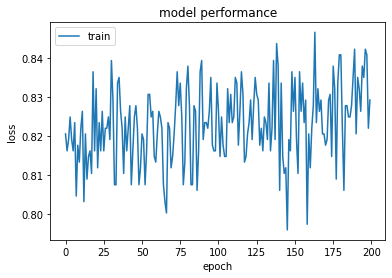

In [ ]:
import matplotlib.pyplot as plt

# model.fit(train_x, train_y, epochs=200, batch_size=32)

hist = model.fit(train_x, train_y, epochs=200, batch_size=32)

# plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Test the NN

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# predictions = []

# p = model.predict(test_x)
# print(p)

# for x in p:
#  if x >= 0.5:
#    predictions.append(1)
#  else:
#    predictions.append(0)

p = model.predict(test_x)
predictions = [int(x >= 0.5) for x in p]
print(predictions)

# predictions = model.predict_classes(test_x)
# print(predictions)

# print(accuracy_score(test_y, predictions))
# print(f1_score(test_y, predictions))

model.evaluate(test_x, test_y)

[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
3/3 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.6883 - precision: 0.6154 - recall: 0.2963


[0.5887349247932434,
 0.6883116960525513,
 0.6153846383094788,
 0.29629629850387573]